# Analisis general: Esculturas publicas de Medellín
## Limpieza

### Importar librerias

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1D1B1D', '#3B393B', '#605A39', '#7A6E45', '#9F8A6A', '#C6A078', '#B65022', '#D47138', '#F2E3C6', '#F5E1B0', '#F4F4F4', '#E0E0E0', '#2F2B2F', '#D9C6AD', '#987E5A']
sns.set_palette(sns.color_palette(colors))

import warnings
warnings.filterwarnings('ignore')

### Importar funciones especializadas

In [2]:
%run '../utils/funciones.ipynb'

### Importar datos

In [3]:
df = pd.read_csv('../data/esculturas-publicas-medellin.csv')
df.tail()

,id,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
165,166,10,la candelaria,jose maria bravo marquez,avenida la playa,busto,NaN,janeth reyes rivera,"6,2484689","-75,5612659"
166,167,10,la candelaria,blanca isaza jaramillo meza,avenida la playa,busto,2006.0,janeth reyes rivera,"6,2484689","-75,5612659"
167,168,10,la candelaria,arbol de la vida - boston,calle 52 con carrera 36,escultura,2012.0,leobardo perez jimenez,"6,2474261","-75,5576255"
168,169,10,la candelaria,general jose maria cordova,carrera 38 con calle 54,escultura,1957.0,marco tobon mejia,"6,2481596","-75,5577608"
169,170,10,la candelaria,carlos castro saavedra,carrera 38 con calle 54,busto,1989.0,oscar rojas,"6,2483950","-75,5573788"


### Imformación general

In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 170 non-null    int64  
 1   codigo-area        170 non-null    int64  
 2   area               170 non-null    object 
 3   name               170 non-null    object 
 4   general-direction  170 non-null    object 
 5   type               170 non-null    object 
 6   year               156 non-null    float64
 7   author             170 non-null    object 
 8   latitude           170 non-null    object 
 9   longitude          170 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 13.4+ KB


## Estandarización de formatos

In [5]:
# Eliminación de la columna 'id' que no aporta información relevante
df = df.drop(columns=['id'])
# Estandarización de los formatos de las columnas
df['latitude'] = df['latitude'].apply(lambda x: x.replace(',', '.')).astype(float)
df['longitude'] = df['longitude'].apply(lambda x: x.replace(',', '.')).astype(float)
df.head()

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
0,3,manrique,carlos gardel,carrera 45 con calle 73,escultura,1968.0,alfonso goez,6.269014,-75.554733
1,3,manrique,jorge eliecer gaitan ayala,carrera 37 con calle 69,escultura,2004.0,rodolfo montoya,6.265313,-75.548335
2,4,aranjuez,talentos en libertad,carrera 48 con calle 93,escultura,2003.0,luz maria piedrahita,6.285199,-75.556308
3,4,aranjuez,antonio nariño,carrera 50 con calle 90,escultura,1962.0,alfonso goez,6.282458,-75.561160
4,4,aranjuez,cristo,carrera 50 con calle 90,escultura,1983.0,josue giraldo,6.282358,-75.561155


## Datos nulos

In [6]:
generar_reporte_nulos(df)

Registros nulos por columna (NaN):
year    14
dtype: int64
---------------------------------


In [7]:
# Proporción de nulos en el dataset (%)
round(14/len(df)*100, 2)

8.24

Se tienen 14 esculturas en Medellín que no registran el año de creación. Puede que por el tiempo se haya borrado su año de creación, es decir, ya no sea legible, o desde su instalación no se hizo el respectivo registro.

Representan aproximadamente el 8% del dataset.

### ¿Cuales son esas esculturas que no registra su año?

In [8]:
df_null = df[df['year'].isnull()].sort_values(by='author')
df_null

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
25,12,la america,el silleterito,calle 46 con carrera 85,escultura,NaN,autor desconocido,6.255953,-75.601386
44,90,santa elena,palomas,parque principal corregimiento de santa elena,escultura,NaN,autor desconocido,6.209949,-75.498063
66,10,la candelaria,benito juarez,calle 37 con carrera 43a,busto,NaN,autor desconocido,6.237018,-75.569743
83,10,la candelaria,replica locomotora,calle 42 con carrera 52,escultura,NaN,autor desconocido,6.244717,-75.572889
124,10,la candelaria,pedro jose berrio,carrera 52 con calle 52,busto,NaN,autor desconocido,6.251460,-75.567700
129,10,la candelaria,san juan bosco,carrera 45 con calle 57,escultura,NaN,autor desconocido,6.253359,-75.560468
71,10,la candelaria,juan del corral - estacion prado,carrera 52 con calle 58,busto,NaN,bernardo vieco,6.256361,-75.566214
65,10,la candelaria,torre roja,calle 31 con carrera 42b,escultura abstracta,NaN,eduardo ramirez villamizar,6.231568,-75.568381
72,10,la candelaria,busto gilberto echeverry,calle 42 con carrera 52,busto,NaN,jairo cano,6.242539,-75.574938
74,10,la candelaria,busto guillerma gaviria,calle 42 con carrera 52,busto,NaN,jairo cano,6.243328,-75.574864


### Analisis

Esculturas sin año registrado por área

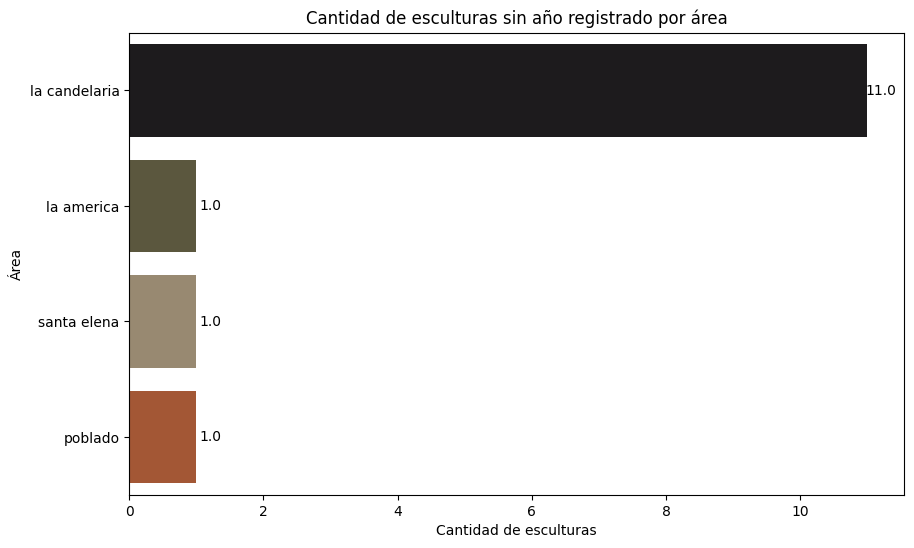

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_null, y='area', order=df_null['area'].value_counts().index, palette=colors)
# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')
plt.title('Cantidad de esculturas sin año registrado por área')
plt.xlabel('Cantidad de esculturas')
plt.ylabel('Área')
plt.show()

Proporción

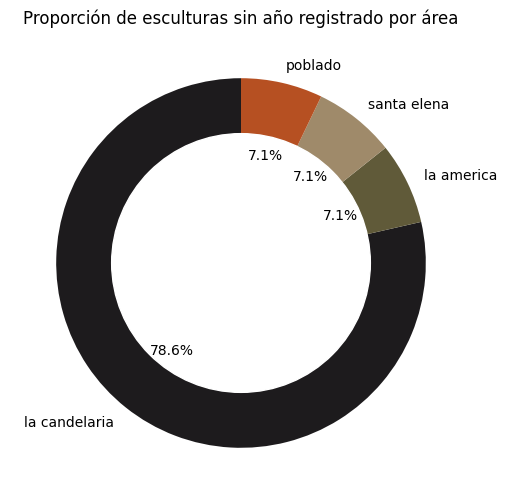

In [10]:
plt.figure(figsize=(10, 6))
circulo = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df_null['area'].value_counts(), labels=df_null['area'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
p = plt.gcf()
p.gca().add_artist(circulo)
plt.title('Proporción de esculturas sin año registrado por área')
plt.show()

Proporción de tipos de esculturas sin año registrado

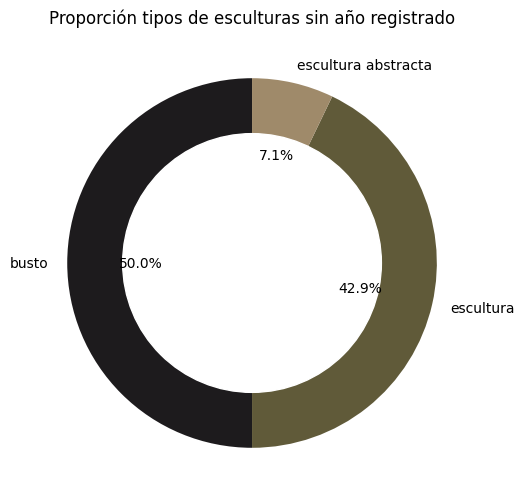

In [11]:
plt.figure(figsize=(10, 6))
circulo = plt.Circle((0, 0), 0.7, color='white')
plt.pie(df_null['type'].value_counts(), labels=df_null['type'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=colors)
p = plt.gcf()
p.gca().add_artist(circulo)
plt.title('Proporción tipos de esculturas sin año registrado')
plt.show()

Esculturas sin año registrado por autor

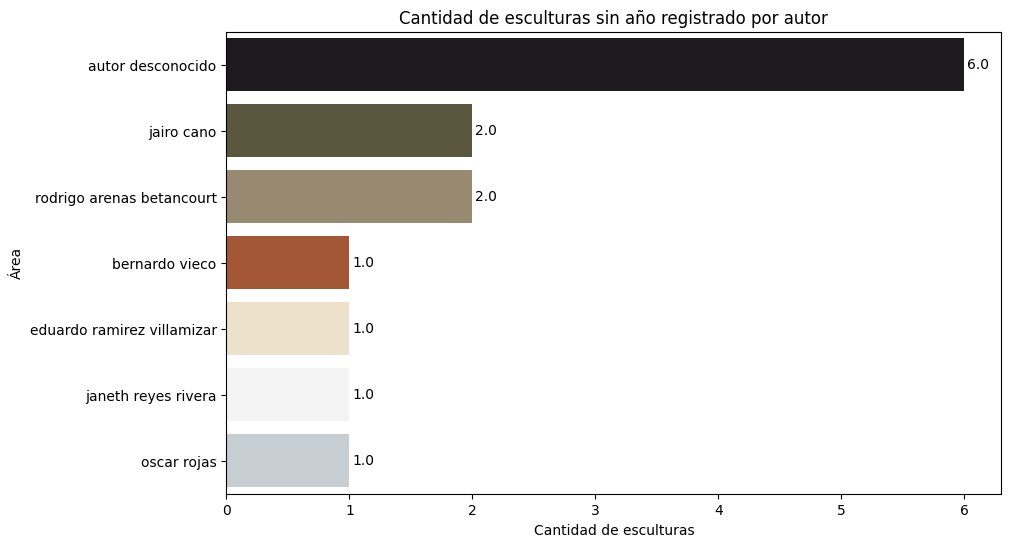

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_null, y='author', order=df_null['author'].value_counts().index, palette=colors)
# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')
plt.title('Cantidad de esculturas sin año registrado por autor')
plt.xlabel('Cantidad de esculturas')
plt.ylabel('Área')
plt.show()

Se opta por eliminar los registros cuyo año esta nulo

In [13]:
df = df.dropna(subset=['year'])
df.reset_index(drop=True, inplace=True)
df['year'] = df['year'].astype(int)
df.head()

,codigo-area,area,name,general-direction,type,year,author,latitude,longitude
0,3,manrique,carlos gardel,carrera 45 con calle 73,escultura,1968,alfonso goez,6.269014,-75.554733
1,3,manrique,jorge eliecer gaitan ayala,carrera 37 con calle 69,escultura,2004,rodolfo montoya,6.265313,-75.548335
2,4,aranjuez,talentos en libertad,carrera 48 con calle 93,escultura,2003,luz maria piedrahita,6.285199,-75.556308
3,4,aranjuez,antonio nariño,carrera 50 con calle 90,escultura,1962,alfonso goez,6.282458,-75.561160
4,4,aranjuez,cristo,carrera 50 con calle 90,escultura,1983,josue giraldo,6.282358,-75.561155


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   codigo-area        156 non-null    int64  
 1   area               156 non-null    object 
 2   name               156 non-null    object 
 3   general-direction  156 non-null    object 
 4   type               156 non-null    object 
 5   year               156 non-null    int64  
 6   author             156 non-null    object 
 7   latitude           156 non-null    float64
 8   longitude          156 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 11.1+ KB


In [15]:
df.to_csv('../data/esculturas-publicas-medellin-limpio.csv', index=False)